In [1]:
import epics
import numpy as _np
from scipy.optimize import curve_fit as _curve_fit

from mathphys.imgproc import Image2D_Fit as _Image2D_Fit
from mathphys.imgproc import FitGaussianScipy as _FitGaussianScipy
from siriuspy.devices import Device as _Device, DVF as _DVF

In [2]:
class DVFImgProc(_DVF):
    """."""
    
    _TIMEOUT_DEFAULT = 5  # [s]
    
    _properties = _DVF._properties + (
        'ImgProperties-Cte', 
        'ImgTimestampBoot-Cte', 
        'ImgTimestampUpdate-Mon', 
        'ImgVersion-Cte', 

        'ImgSizeX-Cte', 'ImgSizeY-Cte',
        'ImgIntensityMax-Mon', 'ImgIntensityMin-Mon',
        'ImgIntensitySum-Mon', 'ImgIsSaturated-Mon',

        'ImgROIX-RB' ,'ImgROIX-SP',
        'ImgROIXCenter-Mon', 'ImgROIXFWHM-Mon',
        'ImgROIY-RB', 'ImgROIY-SP',
        'ImgROIYCenter-Mon', 'ImgROIYFWHM-Mon',

        'ImgLog-Mon',
        'ImgROIUpdateWithFWHM-Sel', 'ImgROIUpdateWithFWHM-Sts',
        'ImgROIYUpdateWithFWHMFactor-RB', 'ImgROIYUpdateWithFWHMFactor-SP',
        'ImgROIXUpdateWithFWHMFactor-RB', 'ImgROIXUpdateWithFWHMFactor-SP',

        'ImgROIXFitMean-Mon', 'ImgROIXFitSigma-Mon',
        'ImgROIXFitAmplitude-Mon', 'ImgROIXFitError-Mon',
        'ImgROIYFitMean-Mon', 'ImgROIYFitSigma-Mon',
        'ImgROIYFitAmplitude-Mon', 'ImgROIYFitError-Mon',
        'ImgFitAngle-Mon',
        )        
        
    _DVF_IMAGE_PROPTY = 'image1:ArrayData'
    
    def __init__(self, devname, *args, **kwargs):
        """."""
        super().__init__(devname=devname, *args, **kwargs)
        self.wait_for_connection(timeout=DVFImgProc._TIMEOUT_DEFAULT)
        self.cmd_update()
        self._add_callback_image()
        
    @property
    def roiy(self):
        """."""
        return self['ImgROIY-RB']
    
    @roiy.setter
    def roiy(self, value):
        """."""
        self['ImgROIY-SP'] = value
    
    @property
    def roix(self):
        """."""
        return self['ImgROIX-RB']
    
    @roix.setter
    def roix(self, value):
        """."""
        self['ImgROIX-SP'] = value

    @property
    def roiy_center(self):
        """."""
        return self['ImgROIYCenter-Mon']
    
    @property
    def roix_center(self):
        """."""
        return self['ImgROIXCenter-Mon']
    
    @property
    def roiy_fwhm(self):
        """."""
        return self['ImgROIYFWHM-Mon']
    
    @property
    def roix_fwhm(self):
        """."""
        return self['ImgROIXFWHM-Mon']
    
    @property
    def roiy_fit_mean(self):
        """."""
        return self['ImgROIYFitMean-Mon']
    
    @property
    def roix_fit_mean(self):
        """."""
        return self['ImgROIXFitMean-Mon']
    
    @property
    def roiy_fit_sigma(self):
        """."""
        return self['ImgROIYFitSigma-Mon']
    
    @property
    def roix_fit_sigma(self):
        """."""
        return self['ImgROIXFitSigma-Mon']
    
    @property
    def roiy_fit_error(self):
        """."""
        return self['ImgROIYFitError-Mon']
    
    @property
    def roix_fit_error(self):
        """."""
        return self['ImgROIXFitError-Mon']
    
    @property
    def roiy_fwhm_factor(self):
        """."""
        return self['ImgROIYUpdateWithFWHMFactor-RB']
    
    @roiy_fwhm_factor.setter
    def roiy_fwhm_factor(self, value):
        """."""
        self['ImgROIYUpdateWithFWHMFactor-SP'] = value
        
    @property
    def roix_fwhm_factor(self):
        """."""
        return self['ImgROIXUpdateWithFWHMFactor-RB']
    
    @roix_fwhm_factor.setter
    def roix_fwhm_factor(self, value):
        """."""
        self['ImgROIXUpdateWithFWHMFactor-SP'] = value
    
    @property
    def roi_with_fwhm(self):
        """."""
        return self['ImgROIUpdateWithFWHM-Sts']
    
    @roi_with_fwhm.setter
    def roi_with_fwhm(self, value):
        """."""
        self['ImgROIUpdateWithFWHM-Sel'] = value == True
        
    @property
    def log(self):
        """."""
        return self['ImgLog-Mon']
    
    @property
    def image2dfit(self):
        """."""
        return self._image2dfit
    
    def cmd_update(self, *args, **kwargs):
        """."""
        curve_fit = _FitGaussianScipy(curve_fit_func=_curve_fit)
        self._image2dfit = _Image2D_Fit(data=self.image, curve_fit=curve_fit, roix=self.roix, roiy=self.roiy)
        
    def _add_callback_image(self):
        """."""
        imgpv = self.pv_object(DVFImgProc._DVF_IMAGE_PROPTY)
        imgpv.add_callback(self.cmd_update)

In [3]:
dvfimgproc = DVFImgProc(devname=DVFImgProc.DEVICES.CAX_DVF2)

In [4]:
dvfimgproc.connected

True

# Test ROI and fitting

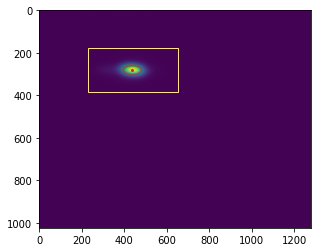

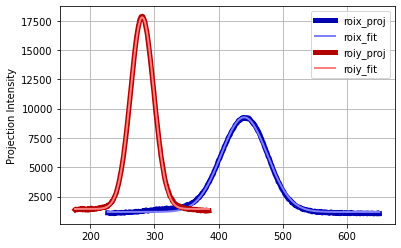

In [27]:
# This will plot current image and fitting

img = dvfimgproc.image2dfit
img.imshow()
img.plot_projections()
# print(img)

In [28]:
# print current roix and roiy

print('roix: ', dvfimgproc.roix)
print('roiy: ', dvfimgproc.roiy)

roix:  [227 652]
roiy:  [176 386]


In [29]:
# calculate new roix and oiy

factor = 5

cx, cy = dvfimgproc.roix_fit_mean, dvfimgproc.roiy_fit_mean
sx, sy = dvfimgproc.roix_fwhm, dvfimgproc.roiy_fwhm

print('mean: ', cx, cy)
print('fwhm: ', sx, sy)

roix = int(cx - factor * sx/2), int(cx + factor * sx/2)
roiy = int(cy - factor * sy/2), int(cy + factor * sy/2)

print('roix: ', roix)
print('roiy: ', roiy)

mean:  439.4529742546752 282.1724784518743
fwhm:  86 42
roix:  (224, 654)
roiy:  (177, 387)


In [26]:
# set new roix and roiy

dvfimgproc.roix = roix
dvfimgproc.roiy = roiy

In [30]:
print('roix_fit_error [%]: ', dvfimgproc.roix_fit_error)
print('roiy_fit_error [%]: ', dvfimgproc.roiy_fit_error)

roix_fit_error [%]:  3.117848008726976
roiy_fit_error [%]:  1.0660199899865601


In [41]:
dvfimgproc.log

''

# ROIUpdateFWHM

In [33]:
print('roix_fwhm_factor: ', dvfimgproc.roix_fwhm_factor)
print('roiy_fwhm_factor: ', dvfimgproc.roiy_fwhm_factor)

roix_fwhm_factor:  5.0
roiy_fwhm_factor:  5.0


In [32]:
dvfimgproc.roix_fwhm_factor = 5
dvfimgproc.roiy_fwhm_factor = 5

In [34]:
dvfimgproc.roi_with_fwhm

0

In [35]:
dvfimgproc.roi_with_fwhm = 1

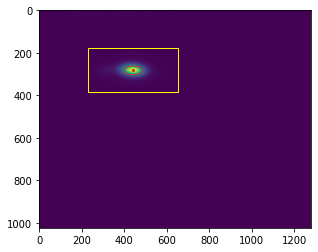

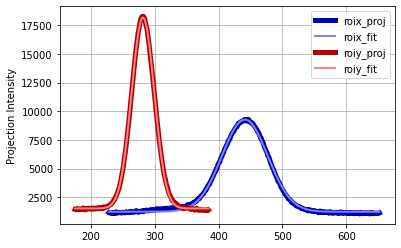

In [36]:
img = dvfimgproc.image2dfit
img.imshow()
img.plot_projections()